### Classifying heart disease based on various symptoms and factors using Logistic Regression (Binary Classification)

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Model 1

### Load Data

In [3]:
df = pd.read_csv('./heart_disease_health_indicators_.csv')

In [4]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### Dropping 'irrelevant' columns

In [6]:
df2 = df.drop(columns=['Education','Income'])

In [7]:
df2

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0


### correlation of the variables

<AxesSubplot:>

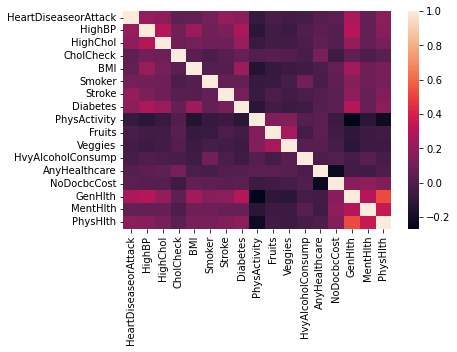

In [8]:
sns.heatmap(df2.iloc[:,0:-3].corr())

### X represents the independent variables, y represents the categorical dependent variable

In [9]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

### splitting the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

### The logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred= classifier.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

### the model's mean accuracy

In [14]:
score = classifier.score(X_test, y_test)
score

0.9089601072216966

#### finding the probability of getting or not getting heart disease (per row) and adding the data to the dataframe

In [15]:
prob = classifier.predict_proba(X)

In [16]:
prob

array([[0.68896199, 0.31103801],
       [0.98238308, 0.01761692],
       [0.70752146, 0.29247854],
       ...,
       [0.99858414, 0.00141586],
       [0.9524913 , 0.0475087 ],
       [0.94360796, 0.05639204]])

In [17]:
df2['prob_noheartdisease'] = prob[:,0]
df2['prob_heartdisease'] = prob[:,1]


In [18]:
df2.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'prob_noheartdisease',
       'prob_heartdisease'],
      dtype='object')

In [19]:
df2[['prob_heartdisease','prob_noheartdisease']]

,prob_heartdisease,prob_noheartdisease
0,0.311038,0.688962
1,0.017617,0.982383
2,0.292479,0.707521
3,0.040716,0.959284
4,0.072956,0.927044
...,...,...
253675,0.053620,0.946380
253676,0.265758,0.734242
253677,0.001416,0.998584
253678,0.047509,0.952491


#### classifying data as either 'potential' (0) or 'not potential' (1) heart disease

In [20]:
pred_vals = classifier.predict(X)

In [21]:
df2['Potential_heart_disease']= pred_vals

In [22]:
df2[['prob_heartdisease','prob_noheartdisease','Potential_heart_disease']]

,prob_heartdisease,prob_noheartdisease,Potential_heart_disease
0,0.311038,0.688962,0.0
1,0.017617,0.982383,0.0
2,0.292479,0.707521,0.0
3,0.040716,0.959284,0.0
4,0.072956,0.927044,0.0
...,...,...,...
253675,0.053620,0.946380,0.0
253676,0.265758,0.734242,0.0
253677,0.001416,0.998584,0.0
253678,0.047509,0.952491,0.0


## Model 2 

#### Use high blood pressure, high cholesterol and smoking as three main risk factors for heart disease

In [29]:
df_2 = pd.read_csv('./heart_disease_health_indicators_.csv', usecols = ['HighBP','HighChol','Smoker','HeartDiseaseorAttack'])

In [30]:
df_2.head()

,HeartDiseaseorAttack,HighBP,HighChol,Smoker
0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0


### correlation matrix

<AxesSubplot:>

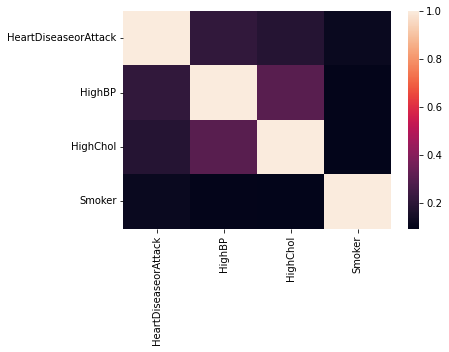

In [31]:
sns.heatmap(df_2.corr())

In [38]:
X2 = df_2.iloc[:,1:] 
y2 = df_2.iloc[:,0]

In [61]:
X2.head()

,HighBP,HighChol,Smoker
0,1.0,1.0,1.0
1,0.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,1.0,0.0


In [62]:
y2.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HeartDiseaseorAttack, dtype: float64

### splitting the data into training and testing sets

In [45]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=0)

### The Logistic regression model

In [47]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X2_train,y2_train)

LogisticRegression()

### Testing

In [48]:
x2_pred = regressor.predict(X2_test)

In [49]:
x2_pred

array([0., 0., 0., ..., 0., 0., 0.])

### Model's mean score

In [52]:
regressor.score(X2_test,y2_test)

0.9059444970040996

### Predicting probability of getting heart disease (per row)

In [63]:
regressor.predict_proba(X2_test)

array([[0.95938668, 0.04061332],
       [0.95938668, 0.04061332],
       [0.95938668, 0.04061332],
       ...,
       [0.97828226, 0.02171774],
       [0.87506343, 0.12493657],
       [0.73846699, 0.26153301]])

In [64]:
regressor.predict_proba(X2)

array([[0.73846699, 0.26153301],
       [0.95938668, 0.04061332],
       [0.84336566, 0.15663434],
       ...,
       [0.97828226, 0.02171774],
       [0.93034241, 0.06965759],
       [0.84336566, 0.15663434]])

### predicting heartdisease classification

In [57]:
df_2['Potential_heart_disease'] = regressor.predict(X2)

In [59]:
df_2[['prob_noheartdisease','prob_heartdisease']] = regressor.predict_proba(X2)

In [60]:
df_2

,HeartDiseaseorAttack,HighBP,HighChol,Smoker,Potential_heart_disease,prob_noheartdisease,prob_heartdisease
0,0.0,1.0,1.0,1.0,0.0,0.738467,0.261533
1,0.0,0.0,0.0,1.0,0.0,0.959387,0.040613
2,0.0,1.0,1.0,0.0,0.0,0.843366,0.156634
3,0.0,1.0,0.0,0.0,0.0,0.930342,0.069658
4,0.0,1.0,1.0,0.0,0.0,0.843366,0.156634
...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,0.0,0.0,0.843366,0.156634
253676,0.0,1.0,1.0,0.0,0.0,0.843366,0.156634
253677,0.0,0.0,0.0,0.0,0.0,0.978282,0.021718
253678,0.0,1.0,0.0,0.0,0.0,0.930342,0.069658
